In [1]:
import sys
import numpy as np
import string
import matplotlib.pyplot as plt
# add the path of gotmtool
sys.path.append("../gotmtool")
from gotmtool import *
from gotmtool.diags import *

## Load data

First, store the information of the four simulations into lists and dictionaries. 

In [2]:
mlist = ['KPP-CVMix', 'GLS-C01A']
flist = ['case1', 'case2', 'case3']
argo_label = 'cold'
# argo_label = 'warm'
ymin = {'cold': -50,
        'warm': -50}
ymax = {'cold': -25,
        'warm': -25}
casenames = []
labels = {}
for mtag in mlist:
    for ftag in flist:
        casename = '{}_{}_{}'.format(argo_label, ftag, mtag)
        print(casename)
        casenames.append(casename)
        label = '{}_{}'.format(ftag, mtag)
        labels[casename] = label
        
colors = {
    casenames[0]: 'tab:blue',
    casenames[1]: 'tab:blue',
    casenames[2]: 'tab:blue',
    casenames[3]: 'tab:red',
    casenames[4]: 'tab:red',
    casenames[5]: 'tab:red',
    }

linestyles = {
    casenames[0]: '-',
    casenames[1]: '--',
    casenames[2]: ':',
    casenames[3]: '-',
    casenames[4]: '--',
    casenames[5]: ':',
    }

casedir = '../gotm/run/Constant_forcing_case2'
save_fig = True

cold_case1_KPP-CVMix
cold_case2_KPP-CVMix
cold_case3_KPP-CVMix
cold_case1_GLS-C01A
cold_case2_GLS-C01A
cold_case3_GLS-C01A


Load data for the four simulations into a dictionary.

In [3]:
sims = {}
dataset = {}
for case in casenames:
    sim = Simulation(path=casedir+'/'+case)
    sims[case] = sim
    dataset[case] = sim.load_data()

## Figure 1


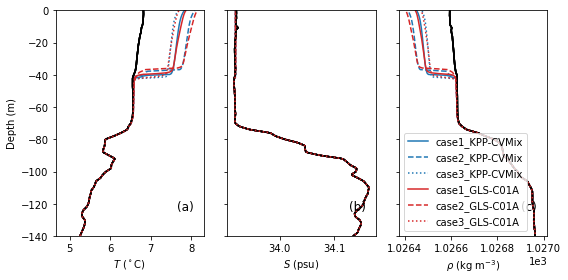

In [4]:
fig, axarr = plt.subplots(1,3, sharey='row')
fig.set_size_inches([8,4])
for case in casenames:
    data = dataset[case]
    data.temp[:,0,0,0].plot(y='z', ax=axarr[0], color='k')
    data.salt[:,0,0,0].plot(y='z', ax=axarr[1], color='k')
    data.rho[:,0,0,0].plot(y='z', ax=axarr[2], color='k')
    data.temp[:,-1,0,0].plot(y='z', ax=axarr[0], color=colors[case], linestyle=linestyles[case])
    data.salt[:,-1,0,0].plot(y='z', ax=axarr[1], color=colors[case], linestyle=linestyles[case])
    data.rho[:,-1,0,0].plot(y='z', ax=axarr[2], color=colors[case], linestyle=linestyles[case], label=labels[case])

for i in np.arange(3):
    axarr[i].set_title('') 
    axarr[i].set_ylabel('') 
    
axarr[0].set_ylim([-140,0])
# axarr[0].set_xlim([8.8, 9.9])
axarr[0].set_ylabel('Depth (m)')
axarr[0].set_xlabel('$T$ ($^\circ$C)')
axarr[1].set_xlabel('$S$ (psu)')
# axarr[1].set_xlim([33.87,33.94])
axarr[2].set_xlabel('$\\rho$ (kg m$^{-3}$)')
# axarr[2].set_xlim([1026.55,1026.75])
axarr[2].ticklabel_format(axis="x", style="sci", scilimits=(-2,2))

axarr[2].legend(loc='lower left')

for i, ax in enumerate(axarr):
    ax.text(0.82, 0.1, '('+string.ascii_lowercase[i]+')', transform=ax.transAxes,
            fontsize=12, va='bottom')

if save_fig:
    plt.tight_layout()
    figname = 'constant_forcing_pfl_{}.pdf'.format(argo_label)
    fig.savefig(figname, dpi=300)

## Figure 2

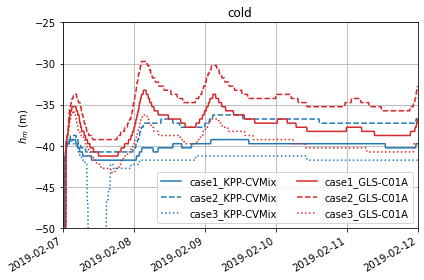

In [5]:
fig = plt.figure(figsize=[6,4])
for case in casenames:
    data = dataset[case]
    time = data.time
#     NN = data.NN[:,:,0,0]
#     mld = get_bld_maxNN(NN)
#     temp = data.temp
#     mld = -get_mld_deltaT(temp[:,:,0,0])
    rho = data.rho
    mld = -get_mld_deltaR(rho[:,:,0,0])
    plt.plot(time, mld.values, color=colors[case], linestyle=linestyles[case], label=labels[case])
#     plt.scatter(hours, mld.values, s=10, color=colors[case], label=labels[case])
plt.ylabel('$h_m$ (m)')
plt.xlabel('')
plt.xlim([time[0], time[-1]])
plt.ylim([ymin[argo_label],ymax[argo_label]])
# plt.legend(loc='lower left')
plt.legend(loc='lower right', ncol=2)
plt.title(argo_label)
plt.grid()
fig.autofmt_xdate()
if save_fig:
    plt.tight_layout()
    figname = 'constant_forcing_ts_{}.pdf'.format(argo_label)
    fig.savefig(figname, dpi=300)

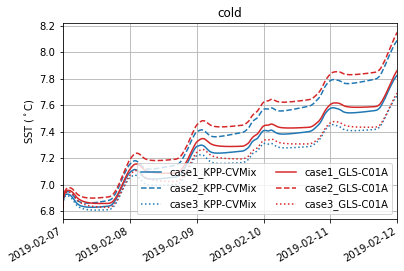

In [6]:
fig = plt.figure(figsize=[6,4])
for case in casenames:
    data = dataset[case]
    time = data.time
    sst = data.temp[-1,:,0,0]
    plt.plot(time, sst.values, color=colors[case], linestyle=linestyles[case], label=labels[case])
#     plt.scatter(hours, mld.values, s=10, color=colors[case], label=labels[case])
plt.ylabel('SST ($^\circ$C)')
plt.xlabel('')
plt.xlim([time[0], time[-1]])
# plt.ylim([ymin[argo_label],ymax[argo_label]])
# plt.legend(loc='lower left')
plt.legend(loc='lower right', ncol=2)
plt.title(argo_label)
plt.grid()
fig.autofmt_xdate()

In [7]:
data.temp

<xarray.DataArray 'temp' (z: 400, time: 721, lon: 1, lat: 1)>
array([[[[4.816607 ]],

        [[4.8166094]],

        [[4.816611 ]],

        ...,

        [[4.817445 ]],

        [[4.8174458]],

        [[4.8174467]]],


       [[[4.8204336]],

        [[4.8204336]],

        [[4.8204336]],
...
        [[7.672603 ]],

        [[7.677812 ]],

        [[7.682767 ]]],


       [[[6.82     ]],

        [[6.8804283]],

        [[6.9022913]],

        ...,

        [[7.6847477]],

        [[7.6898675]],

        [[7.694726 ]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2019-02-07 2019-02-07T00:10:00 ... 2019-02-12
  * lon      (lon) float32 -145.0
  * lat      (lat) float32 -53.0
  * z        (z) >f4 -199.8 -199.2 -198.8 -198.2 ... -1.75 -1.25 -0.75 -0.25
Attributes:
    units:          Celsius
    long_name:      potential temperature
    standard_name:  sea_water_temperature
    path:           /temperature_and_salinity